# Stock Market Prediction Project

In this project I will apply concepts of data analysis and machine learning to analyze and predict stock performance. This information will be used to make trades on Investopedia.

Here's my account name: neeyatiajmera


## Week 1:

Since I am completely new to stock market, this week I mainly focused on getting acquainted with the stock market and learning about the jargon and all the key concepts. I learnt about how the stock market functions, how trading works and what are the different investing strategies. I was particularly influenced by Warren Buffett's investing strategy. One of his principals is to invest for the long term as the stock market in the short run is highly unpredictable and similar to gambling. Buy-and-hold is a long-term investment strategy that involves purchasing securities and keeping them in your portfolio for a long period of time. Some acclaimed investors say that buy-and-hold investing is the best way to manage risk and work toward long-term financial goals.


With that knowledge I decided to look for blue chip companies that have had steady holdings over the past year. I referred to this website: https://money.usnews.com/investing/stock-market-news/slideshows/best-blue-chip-stocks-to-buy-this-year?slide=2

Blue-chip stocks are shares of large, established, and financially stable companies that have been around for a long time. A blue-chip stock is usually a highly valued and well-known company with characteristics that benefit investors over the long run, such as stable cash flows and consistent dividends. Investors generally consider blue-chip stocks to be among the most secure stock investments because of their track records and performance history. As a beginner investor, I perceived this investment to be most secure and reliable till I got more informed and knowledgeable about the stock market. 

To begin with, I decided to invest in these 4 blue-chip stocks:
- Berkshire Hathaway Class B stock
- 3M company
- JP Morgan Chase
- Johnson and Johnson

I will be holding onto these stocks till the end of the simulation as I aim for long-term holding. 

This week I also decided to do some research on how would I be analyzing stocks using quantative analysis. I found that there are numerous ways to analyze and predict stocks ranging from a simple regression to a more complicated time-series machine learning model.

I narrowed down on the following techniques that I will be using to make my judgement:
- Week 2: Perform Exploratory analysis on top Tech/EV stocks with moving averages and percent increase in stock value
- Week 3 & 4: Develop a forecasting LSTM Model to predict stock prices for the chosen companies




## Week 2:

This week I will be performing some exploratory data analysis on some top tech/EV stocks and this analysis will help me select the stocks that I would like to buy. I chose Tesla, Nvidia and Microsoft as the companies I'd like to potentially explore. 

For the purpose of this analysis, I will be using the following tools and libraries:
- Yahoo Finance:For downloading stock data
- Pandas: For handling data frames in python
- Numpy: For performing calculations
- Matplotlib: For plotting graphs

I will be downloading the daily stock price data using the Yahoo Finance API. Instead of the usual 5 years, I decided to go with 7 year data to help me predict better. The data includes the open and close prices of each stock each day, the highs and lows of each day as well as the volume of stock traded each day. I wasn't aware of what these meant but through my initial research during week 1, I understood them better:

- Open: The price of the stock when the market opens in the morning
- Close: The price of the stock when the market closed in the evening
- High: Highest price the stock reached during that day
- Low: Lowest price the stock is traded on that day
- Volume: The total amount of stocks traded on that day


In [5]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
!pip install yfinance
import yfinance as yf
%matplotlib inline


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


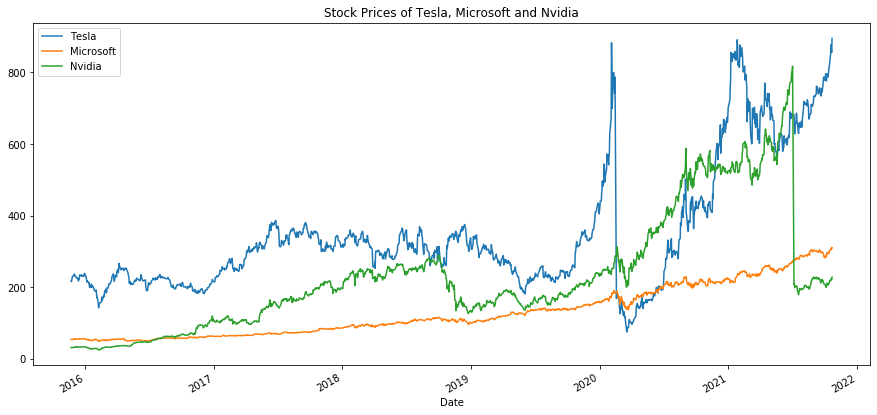

In [8]:
start = "2015-11-23"
end = "2021-10-23"
tesla = yf.download('TSLA',start,end)
microsoft = yf.download('MSFT',start,end)
nvidia = yf.download('NVDA',start,end)

tesla['Open'].plot(label = 'Tesla', figsize = (15,7))
microsoft['Open'].plot(label = 'Microsoft')
nvidia['Open'].plot(label = 'Nvidia')
plt.title('Stock Prices of Tesla, Microsoft and Nvidia')
plt.legend()

Here we can see the graphs of the stock prices of all three companies over 7 years. Microsoft sees a smooth inclination over the years. The stock is up 43% over the last year, after more than quadrupling over the last five years. It is a growth company and in fact in October 2021, Microsoft passed Apple in market cap, making it the world’s most valuable public company.

Now, we look at Tesla. Tesla is a relatively new company and it has seen a bumpy road with many ups and downs. It's stock price is highly fluctuative as compared to Microsoft. Tesla's stock has surged more than 20,000% since it went public in 2010. Infact it has also been added to the S&P500 index. 

Lastly, Nvidia's stock price saw a decline in the middle but from historical data, we have seen such declines in the past and the stock recovered from it.

Now, we will look at the volume traded for each of these companies. Trading volume is the total number of shares of a security that were traded during a given period of time. Trading volume is a technical indicator because it represents the overall activity of a security or a market. If trading volume increases, prices generally move in the same direction. That is, if a security is continuing higher in an uptrend, the volume of the security should also increase and vice versa.

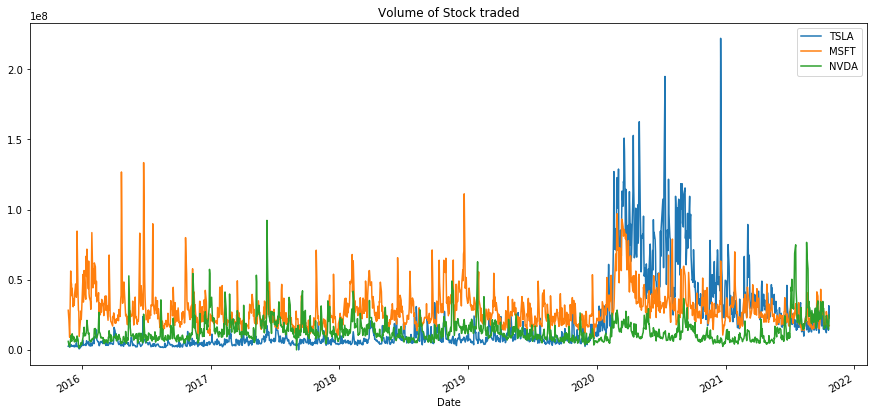

In [10]:
#Volume
tesla['Volume'].plot(label = 'TSLA', figsize = (15,7))
microsoft['Volume'].plot(label = "MSFT")
nvidia['Volume'].plot(label = 'NVDA')
plt.title('Volume of Stock traded')
plt.legend()

Here we can see how Tesla's stock was traded heavily in the past 2 years and that led to a sharp increase in its stock price. The volume traded for Microsoft and Nvidia are fairly constant over the years. 

Market capitalization is a useful figure to examine when trying to understand a company's structure and profitability, and therefore a stock's value. It can be used to determine a variety of key performance metrics.


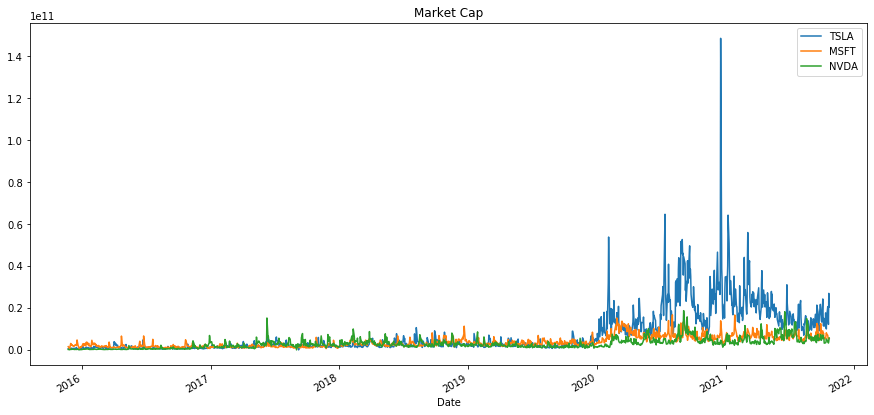

In [15]:
#Market Capitalisation
tesla['MarktCap'] = tesla['Open'] * tesla['Volume']
microsoft['MarktCap'] = microsoft['Open'] * microsoft['Volume']
nvidia['MarktCap'] = nvidia['Open'] * nvidia['Volume']
tesla['MarktCap'].plot(label = 'TSLA', figsize = (15,7))
microsoft['MarktCap'].plot(label = 'MSFT')
nvidia['MarktCap'].plot(label = 'NVDA')
plt.title('Market Cap')
plt.legend()



The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks or any time period the trader chooses. We will take 2 moving averages:  50 day period and 200 day period.

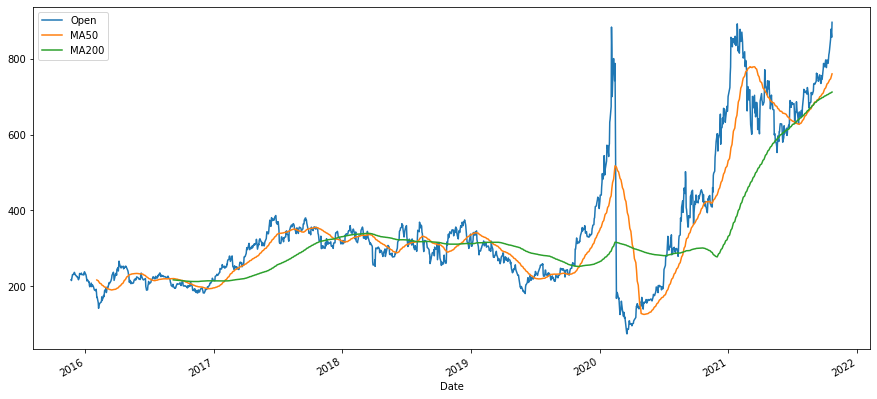

In [20]:
#Moving Averages
tesla['MA50'] = tesla['Open'].rolling(50).mean()
tesla['MA200'] = tesla['Open'].rolling(200).mean()
tesla['Open'].plot(figsize = (15,7))
tesla['MA50'].plot()
tesla['MA200'].plot()
plt.legend()


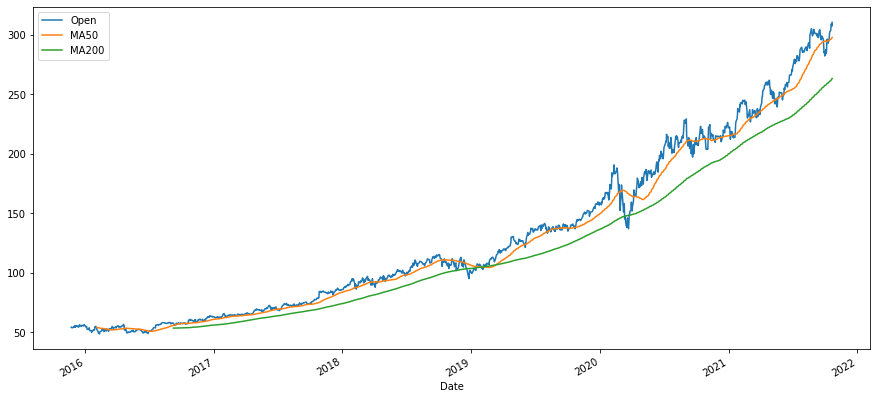

In [18]:
microsoft['MA50'] = microsoft['Open'].rolling(50).mean()
microsoft['MA200'] = microsoft['Open'].rolling(200).mean()
microsoft['Open'].plot(figsize = (15,7))
microsoft['MA50'].plot()
microsoft['MA200'].plot()
plt.legend()

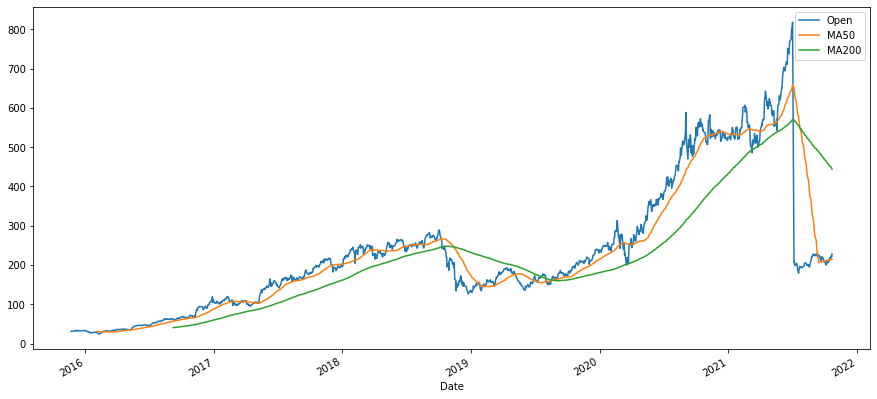

In [19]:
nvidia['MA50'] = nvidia['Open'].rolling(50).mean()
nvidia['MA200'] = nvidia['Open'].rolling(200).mean()
nvidia['Open'].plot(figsize = (15,7))
nvidia['MA50'].plot()
nvidia['MA200'].plot()
plt.legend()

Let's examine if there's any correlation between the stock prices movement of these 3 companies. For this purpose, we will use a scatter plot matrix. A scatter plot matrix is a grid (or matrix) of scatter plots used to visualize bivariate relationships between combinations of variables. Each scatter plot in the matrix visualizes the relationship between a pair of variables, allowing many relationships to be explored in one chart.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011152734208>,
      dtype=object)

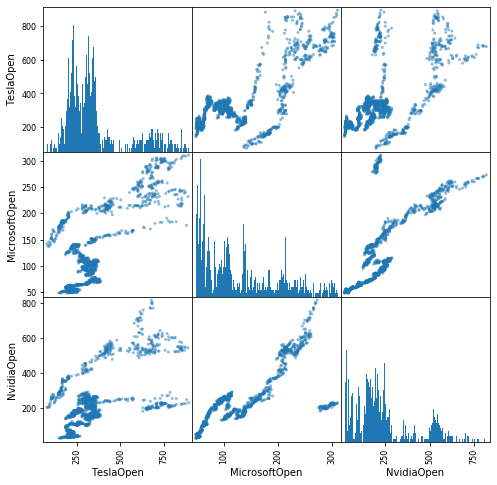

In [21]:
#Scattered Plot Matrix
data = pd.concat([tesla['Open'],microsoft['Open'],nvidia['Open']],axis = 1)
data.columns = ['TeslaOpen','MicrosoftOpen','NvidiaOpen']
scatter_matrix(data, figsize = (8,8), hist_kwds= {'bins':250})


Here we can see that Nvidia and Microsoft stock prices are showing a close relation. This makes sense because both of them belong to the tech sector and are interdependent on each other's success. Microsoft has a partnership with NVIDIA for its chips.

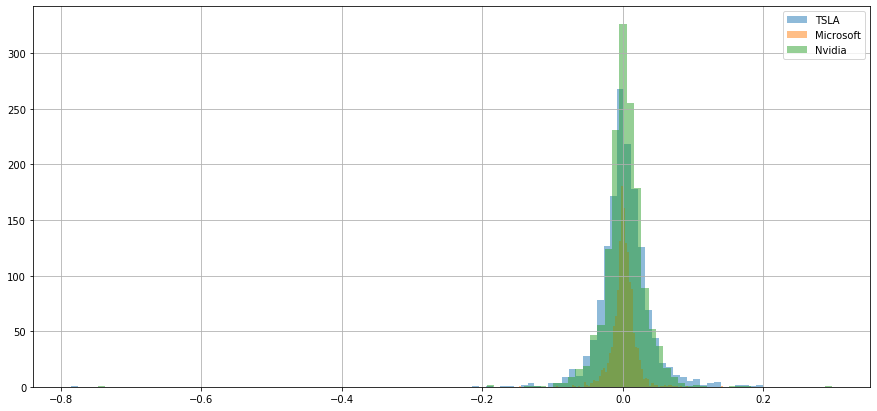

In [22]:
#Volatility
tesla['returns'] = (tesla['Close']/tesla['Close'].shift(1)) -1
microsoft['returns'] = (microsoft['Close']/microsoft['Close'].shift(1))-1
nvidia['returns'] = (nvidia['Close']/nvidia['Close'].shift(1)) - 1
tesla['returns'].hist(bins = 100, label = 'TSLA', alpha = 0.5, figsize = (15,7))
microsoft['returns'].hist(bins = 100, label = 'Microsoft', alpha = 0.5)
nvidia['returns'].hist(bins = 100, label = 'Nvidia', alpha = 0.5)
plt.legend()

Here we see how volatile each company's stock price is. We can see how microsoft's price is less volatile compared to Tesla and Nvidia's price. 

Looking at all the metrics and performing an exploratory analysis, I decided to buy shares of all three companies. Microsoft has a lot of security and reliability as a company. Tesla has aggressive growth and has seen massive rise in the past few years. Nvidia, while it has seen drops, through historical data, we have seen its potential to jump back and therefore since it is a dip, it would be perfect to buy the stock. 

In the following week, I'll be analyzing data from Yahoo Finance and will be using pasdas_datareader API to analyze data from the past 3 months. In particular, I will be using time-series forecasting to build a LSTM model.

Time-series forecasting models are the models that are capable to predict future values based on previously observed values. 

## Week 3:

This week I will be using a more complicated model into examining stock prices. I'll be analyzing data from Yahoo Finance and will be using pasdas_datareader API to analyze data from the past 3 months. In particular, I will be using time-series forecasting to build a LSTM model. Time-series forecasting models are the models that are capable to predict future values based on previously observed values. 

This week I was trying out this LSTM model with Microsoft as the chosen company. Since I already analyzed Microsoft's data last week, it would be nice to see if it was indeed a good buy or not using the LSTM model. While I tested this model out this week, I also invested in certain healthcare stocks like iCAD, Pfizer and United Health Group. If my model was successful then I would be using it for purchasing stocks next week. 

- iCAD
- Pfizer
- United Health Group

